Hashwanth Moorthy, Tejesvani Muppara Vijayaram, Aadarsh Praveen S A

Date: March 26th, 2024


Professor: Satwik Kamarthi

Subject: IE6600 Computation & Visualization



---
# **HEART DISEASE ANALYSIS**
---




Dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data

In [ ]:
%cd '/content/drive/MyDrive/CompViz/Project3/Dataset/HeartDisease/2022/'

/content/drive/MyDrive/CompViz/Project3/Dataset/HeartDisease/2022


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart_2022_no_nans.csv')

In [ ]:
df.shape

(246022, 40)

In [ ]:
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  int64  
 4   MentalHealthDays           246022 non-null  int64  
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  int64  
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [ ]:
df.describe(include='all')

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,246022,246022,246022,246022.000000,246022.000000,246022,246022,246022.000000,246022,246022,...,246022.000000,246022.000000,246022.000000,246022,246022,246022,246022,246022,246022,246022
unique,54,2,5,NaN,NaN,4,2,NaN,4,2,...,NaN,NaN,NaN,2,2,2,2,4,2,3
top,Washington,Female,Very good,NaN,NaN,Within past year (anytime less than 12 months ...,Yes,NaN,None of them,No,...,NaN,NaN,NaN,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,15000,127811,86999,NaN,NaN,198153,191318,NaN,131592,232587,...,NaN,NaN,NaN,135307,161520,131196,146130,81747,235446,167306
mean,NaN,NaN,NaN,4.119026,4.167140,NaN,NaN,7.021331,NaN,NaN,...,1.705150,83.615179,28.668136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.405844,8.102687,NaN,NaN,1.440681,NaN,NaN,...,0.106654,21.323156,6.513973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,...,0.910000,28.120000,12.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,6.000000,NaN,NaN,...,1.630000,68.040000,24.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,7.000000,NaN,NaN,...,1.700000,81.650000,27.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,4.000000,NaN,NaN,8.000000,NaN,NaN,...,1.780000,95.250000,31.890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['State'] = df['State'].replace('District of Columbia', 'Columbia')

In [ ]:
df['SmokerStatus'] = df['SmokerStatus'].replace('Current smoker - now smokes every day', 'Current Smoker')
df['SmokerStatus'] = df['SmokerStatus'].replace('Current smoker - now smokes some days', 'Current Smoker')

In [ ]:
df['HadDiabetes'] = df['HadDiabetes'].replace('No, pre-diabetes or borderline diabetes', 'No, borderline diabetes')
df['HadDiabetes'] = df['HadDiabetes'].replace('Yes, but only during pregnancy (female)', 'Yes, during pregnancy (female)')

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

State: 54 distinct values
Sex: 2 distinct values
GeneralHealth: 5 distinct values
PhysicalHealthDays: 31 distinct values
MentalHealthDays: 31 distinct values
LastCheckupTime: 4 distinct values
PhysicalActivities: 2 distinct values
SleepHours: 23 distinct values
RemovedTeeth: 4 distinct values
HadHeartAttack: 2 distinct values
HadAngina: 2 distinct values
HadStroke: 2 distinct values
HadAsthma: 2 distinct values
HadSkinCancer: 2 distinct values
HadCOPD: 2 distinct values
HadDepressiveDisorder: 2 distinct values
HadKidneyDisease: 2 distinct values
HadArthritis: 2 distinct values
HadDiabetes: 4 distinct values
DeafOrHardOfHearing: 2 distinct values
BlindOrVisionDifficulty: 2 distinct values
DifficultyConcentrating: 2 distinct values
DifficultyWalking: 2 distinct values
DifficultyDressingBathing: 2 distinct values
DifficultyErrands: 2 distinct values
SmokerStatus: 3 distinct values
ECigaretteUsage: 4 distinct values
ChestScan: 2 distinct values
RaceEthnicityCategory: 5 distinct values
AgeC

## 1. Descriptive Analysis

In [ ]:
df_had_heartAttack = df[df['HadHeartAttack'] == 'Yes']
df_no_heartAttack = df[df['HadHeartAttack'] == 'No']
df_heartAttack_count = df['HadHeartAttack'].value_counts()

In [ ]:
df_heartAttack_count

No     232587
Yes     13435
Name: HadHeartAttack, dtype: int64

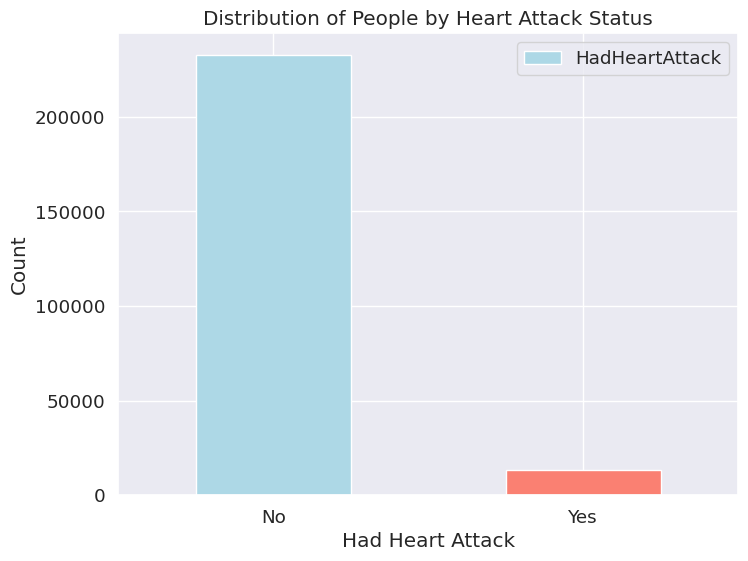

In [ ]:
plt.figure(figsize=(8, 6))
df_heartAttack_count.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribution of People by Heart Attack Status')
plt.xlabel('Had Heart Attack')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In summary, the data indicates that a majority of surveyed individuals did not report experiencing a heart attack. Further analysis is needed to understand associated factors and potential risk factors contributing to heart attacks in this population


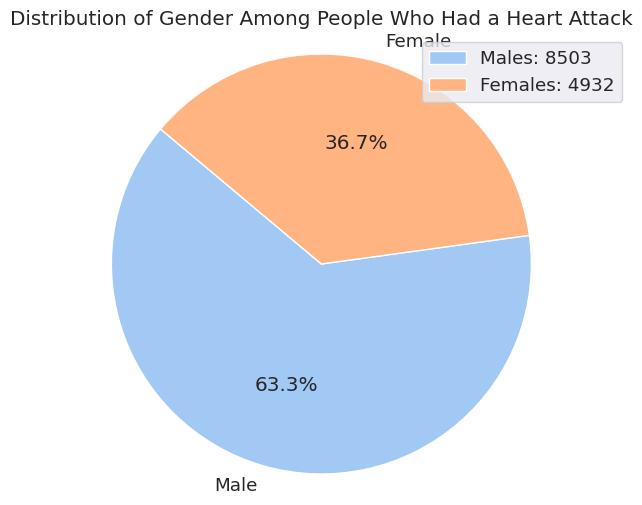

In [ ]:
# Count the number of individuals by gender who had a heart attack
gender_distribution = df_had_heartAttack['Sex'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribution of Gender Among People Who Had a Heart Attack')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
legend_labels = [f'Males: {gender_distribution.Male}', f'Females: {gender_distribution.Female}']
plt.legend(legend_labels, loc='upper right')
plt.show()

The predominance of males, constituting 63.3% of individuals who had a heart attack compared to 36.7% females, indicates a potential gender disparity in heart attack prevalence within the dataset. Further investigation into gender-specific risk factors and healthcare access may shed light on these disparities.

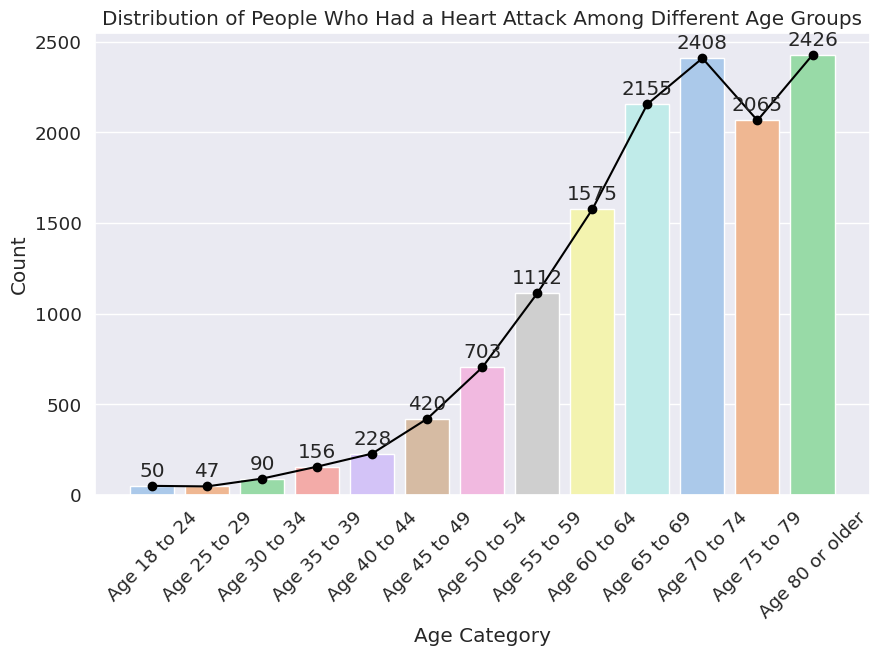

In [ ]:
# Group the data by age categories and count the number of individuals who had a heart attack
age_group_distribution = df_had_heartAttack['AgeCategory'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette='pastel')

# Adding line plot
plt.plot(age_group_distribution.index, age_group_distribution.values, marker='o', color='black', linestyle='-')

# Adding counts on top of the bars
for i, v in enumerate(age_group_distribution.values):
    ax.text(i, v + 30, str(v), ha='center', va='bottom')

plt.title('Distribution of People Who Had a Heart Attack Among Different Age Groups')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The distribution of heart attacks across different age groups reveals a clear trend of increasing occurrence with advancing age. The counts progressively rise from younger age categories to older ones, with the highest counts observed in individuals aged 70 or older. This suggests that age is a significant factor influencing the risk of experiencing a heart attack, aligning with established medical knowledge that identifies older age as a major risk factor for cardiovascular diseases. These findings underscore the importance of age-appropriate preventive measures and targeted interventions aimed at promoting heart health and reducing the burden of heart disease, particularly among the elderly population.


In [ ]:
df['State'].nunique()

54

In [ ]:
!pip install squarify

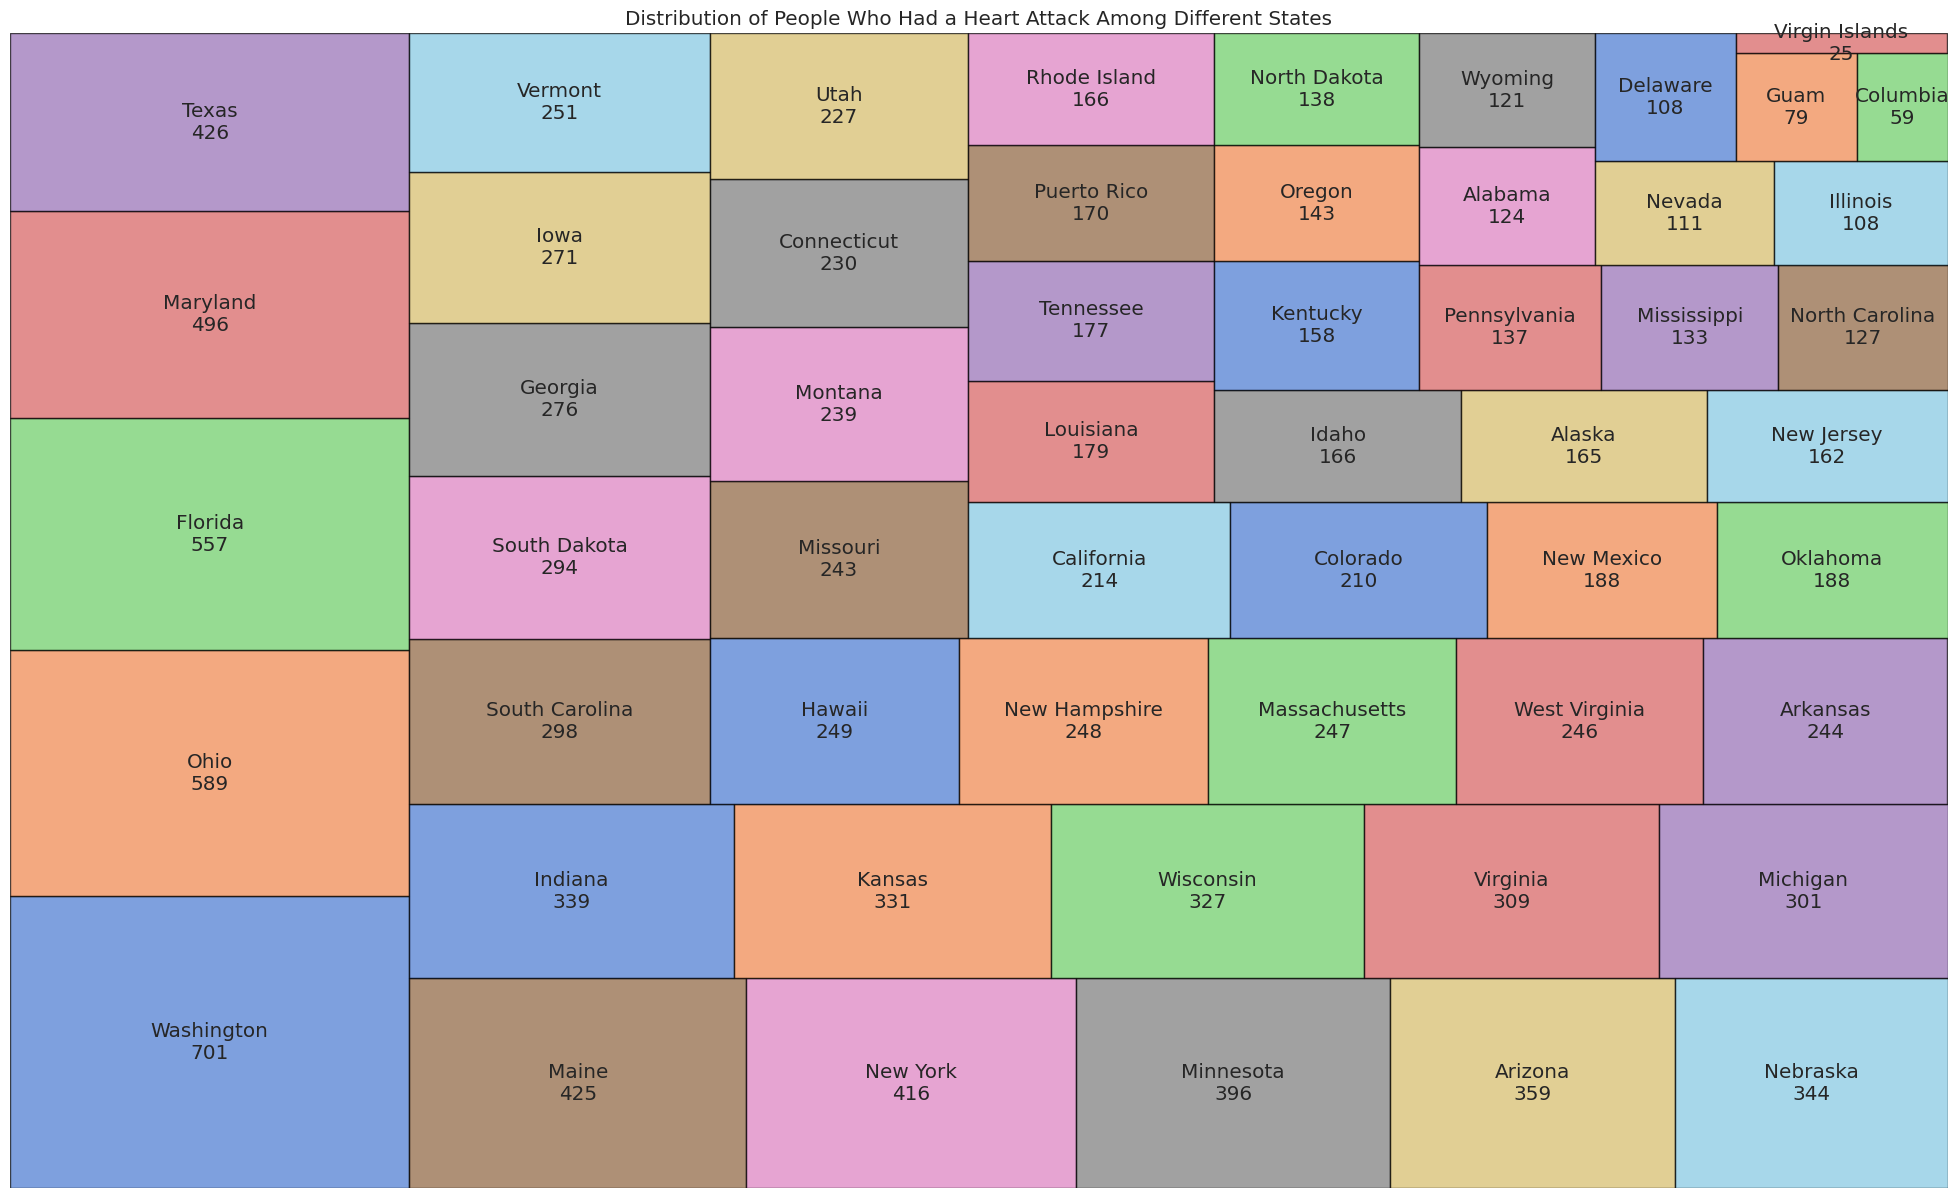

In [ ]:
import squarify

# Group the data by states and count the number of individuals who had a heart attack in each state
state_distribution = df_had_heartAttack['State'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(25, 15))
squarify.plot(sizes=state_distribution.values, label=[f'{state}\n{count}' for state, count in zip(state_distribution.index, state_distribution.values)], color=sns.color_palette('muted'), edgecolor='black', alpha=0.7)
plt.title('Distribution of People Who Had a Heart Attack Among Different States')
plt.axis('off')  # Turn off axis
plt.show()

The distribution of heart attacks across states highlights varying prevalence rates, with states like Washington, Ohio, and Florida showing higher incidences. Conversely, areas such as Guam, the District of Columbia, and the Virgin Islands exhibit lower counts, suggesting potential disparities in healthcare access or population demographics. Understanding these geographical differences can inform targeted interventions to address cardiovascular health needs effectively, emphasizing preventive measures and resource allocation tailored to specific regions. Further exploration of underlying factors driving these variations is crucial for developing comprehensive strategies aimed at reducing the overall burden of heart disease nationwide


## 2. Exploratory Analysis

In [ ]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

#### Univariant Analysis

 Univariate analysis for PhysicalHealthDays column:
 Univariate analysis for MentalHealthDays column:
 Univariate analysis for SleepHours column:
 Univariate analysis for HeightInMeters column:
 Univariate analysis for WeightInKilograms column:
 Univariate analysis for BMI column:


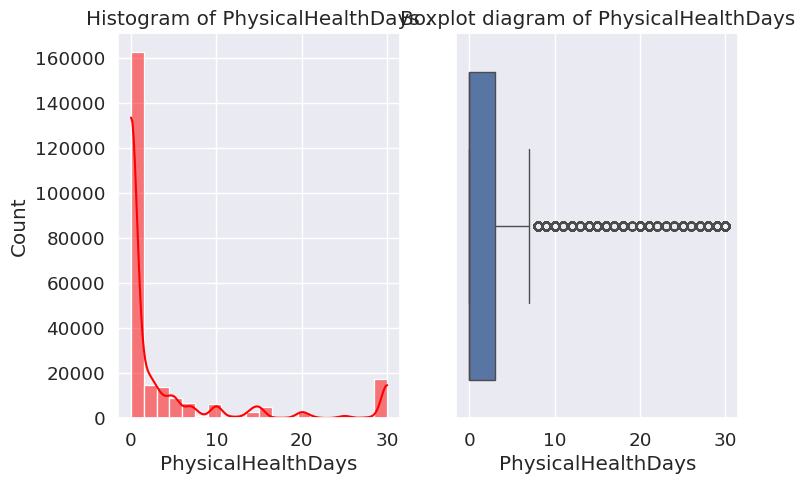

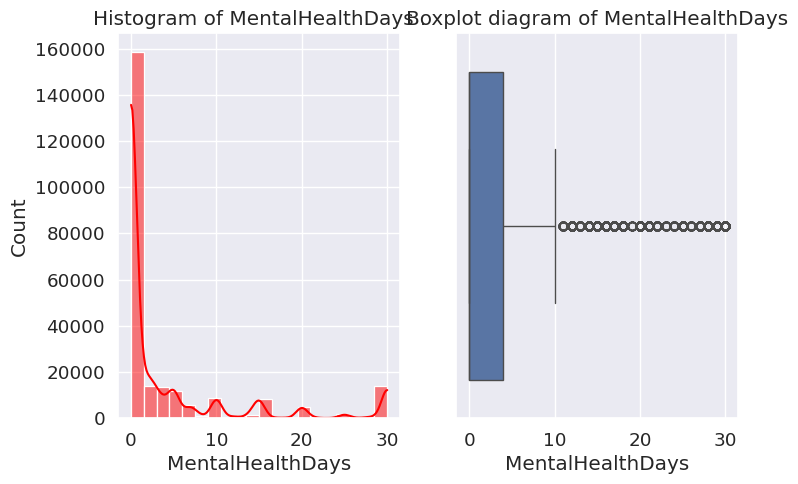

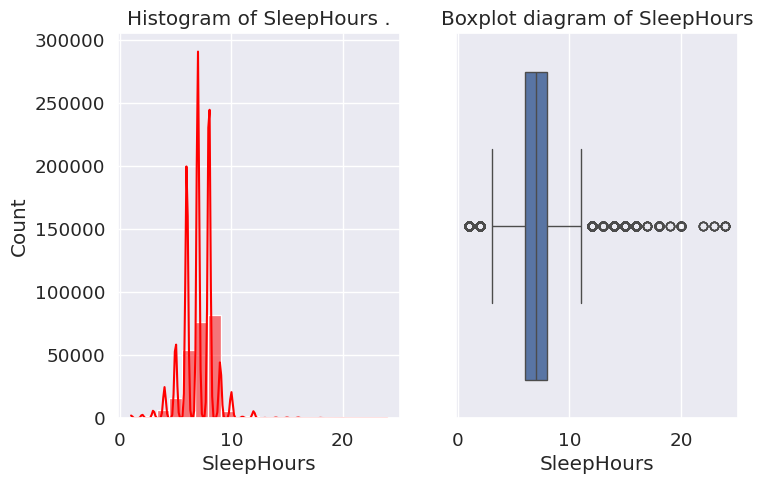

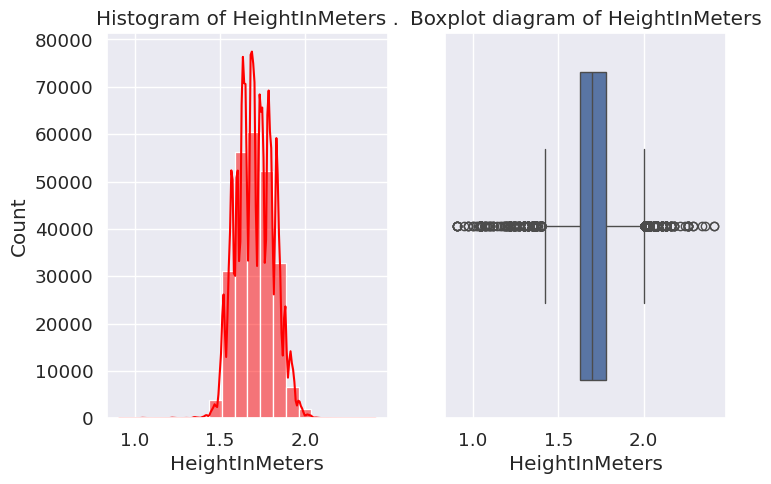

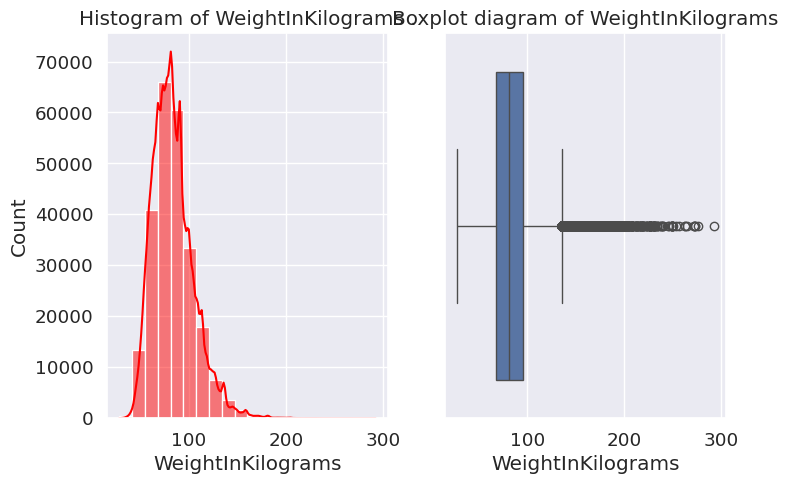

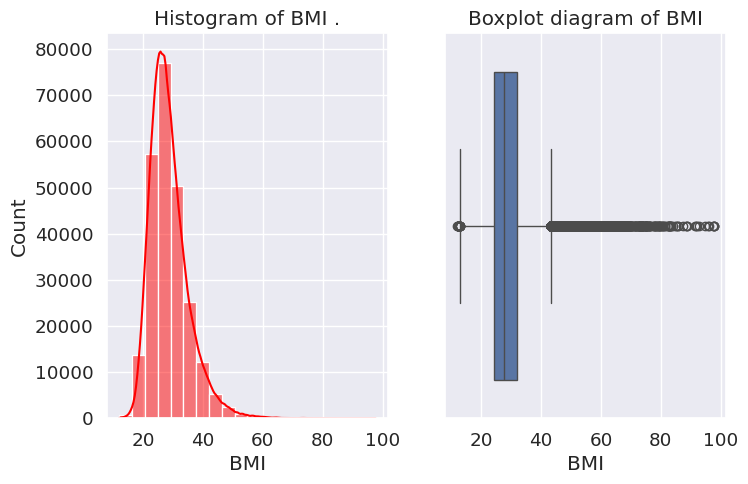

In [ ]:
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=20, color='Red',ax=ax[0])
    ax[0].set_title(f'Histogram of {col} .')

    sns.boxplot(x=df[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}')

for col in numeric_cols:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

Overall, the univariate analysis reveals several key insights into the numeric columns of the dataset:

Physical and Mental Health Days: The average number of days individuals reported for both physical and mental health issues is relatively low, with means around 4 days. However, there is considerable variability, as indicated by the relatively high standard deviations.

Sleep Hours: On average, individuals reported sleeping for about 7 hours per day, with a standard deviation of approximately 1.44 hours. This suggests some variability in sleep patterns among the population.

Height and Weight: The average height is approximately 1.705 meters, and the average weight is about 83.615 kilograms. The distribution of both height and weight appears to be relatively normal, as indicated by the comparable means and medians.

BMI (Body Mass Index): The average BMI falls within the overweight category (above 25), with a mean of approximately 28.668. This indicates that, on average, individuals in the dataset may have higher body mass indexes, potentially indicating an increased risk of health issues associated with obesity.

In summary, the dataset comprises individuals with varied health behaviors and characteristics, with notable variability in reported physical and mental health days, sleep patterns, and body measurements. Further analysis and exploration of these factors could provide valuable insights into overall health trends and potential areas for intervention or further study.

In [ ]:
mypal = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']

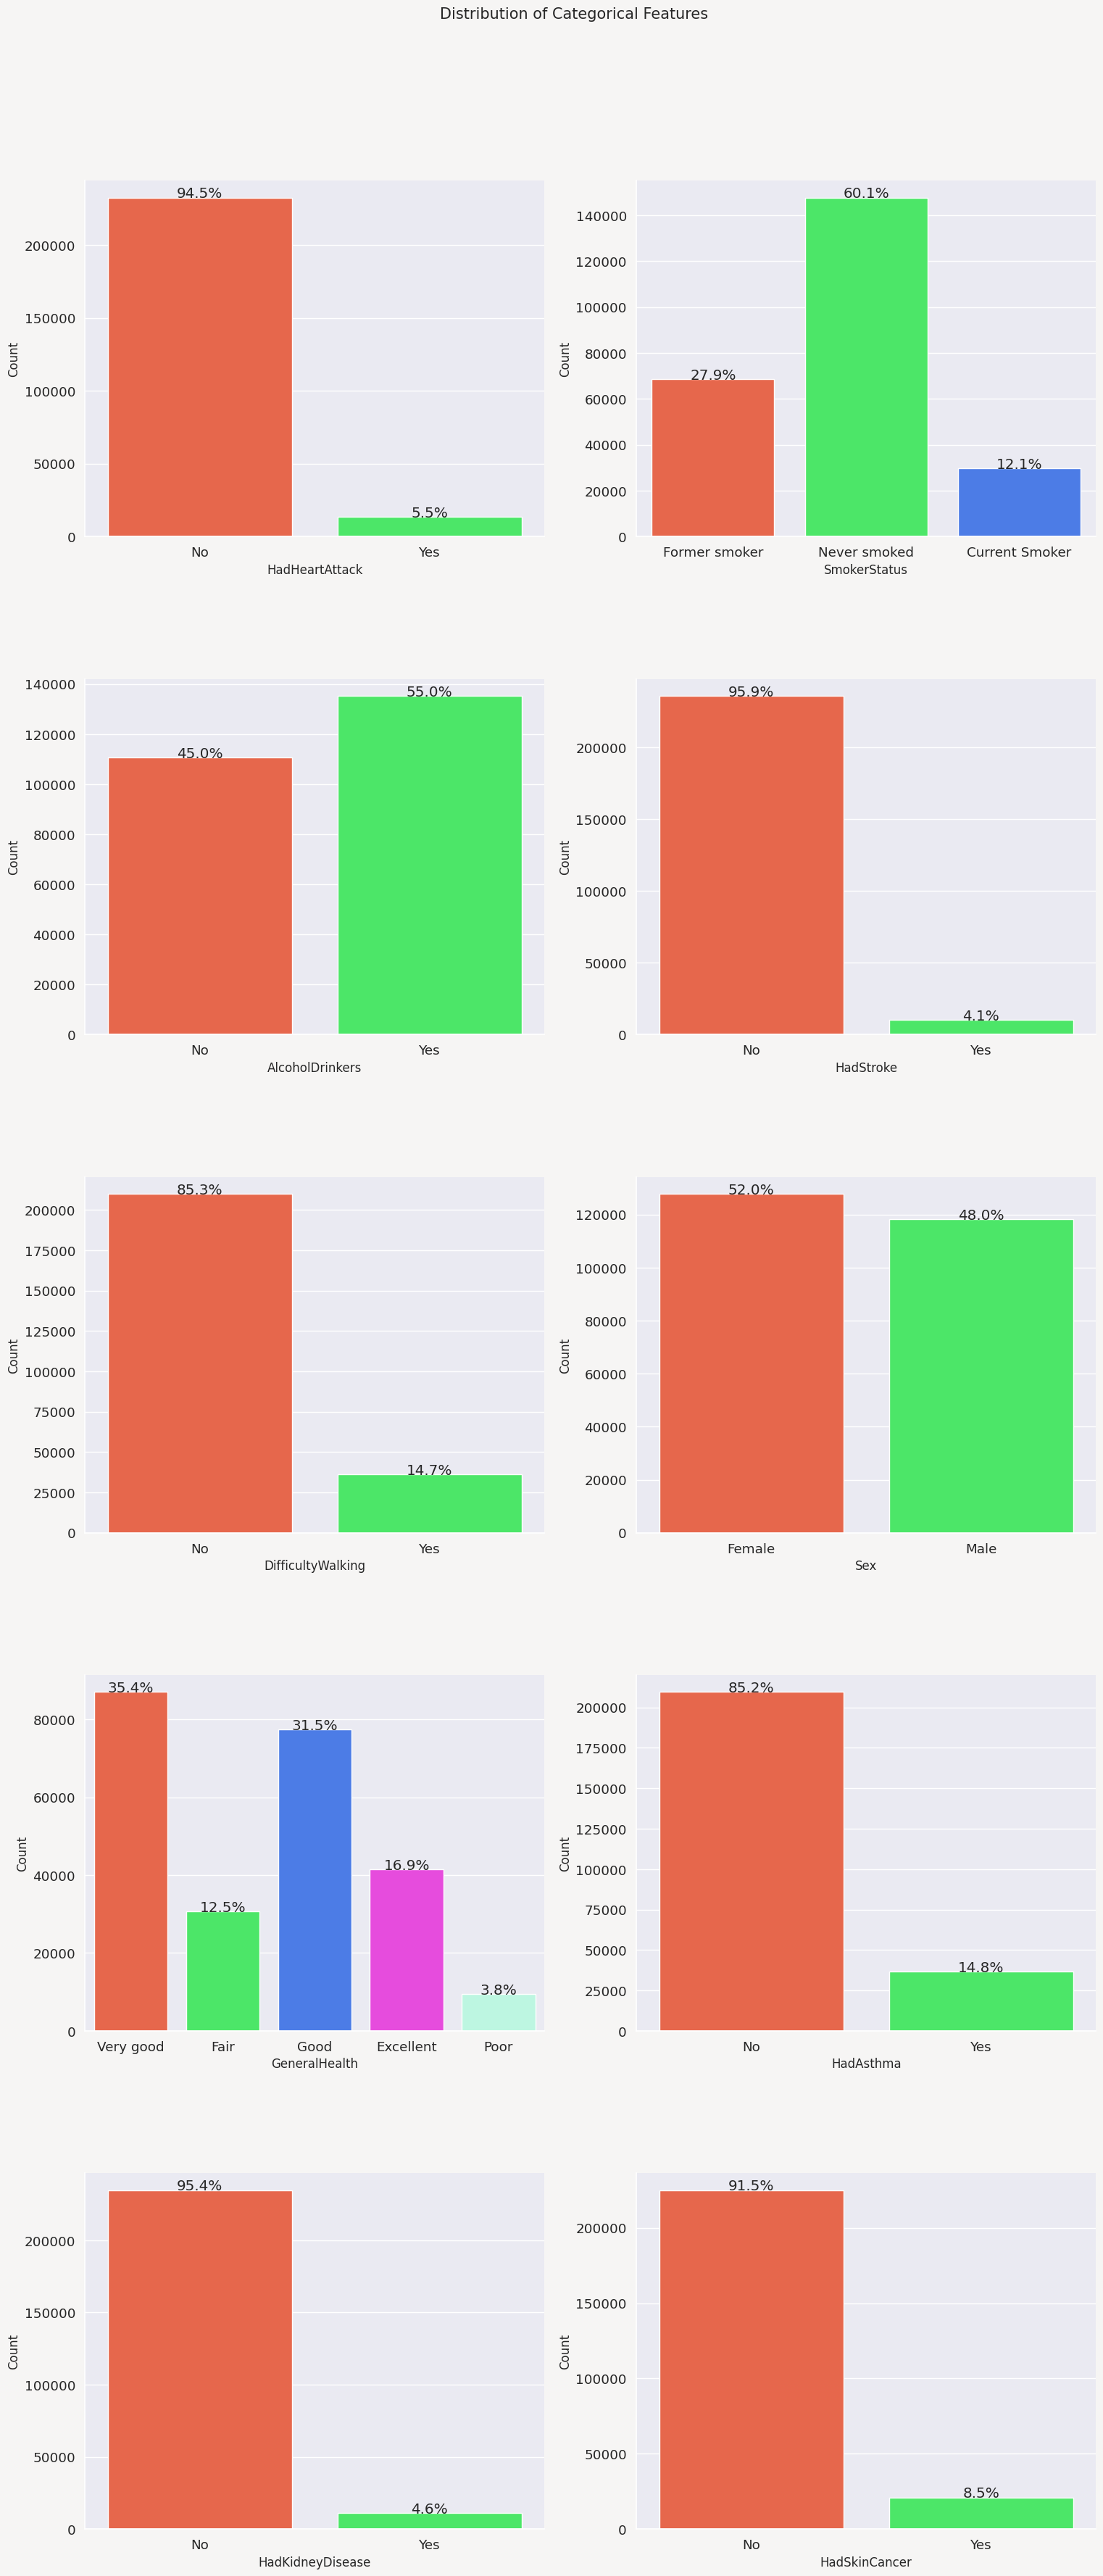

In [ ]:
cat_feats = ['HadHeartAttack', 'SmokerStatus', 'AlcoholDrinkers', 'HadStroke', 'DifficultyWalking', 'Sex', 'GeneralHealth', 'HadAsthma', 'HadKidneyDisease', 'HadSkinCancer']

L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)

i = 0
for col in cat_feats:
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=df, x=col, palette=mypal, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    i += 1

if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features', fontsize=15)
plt.show()

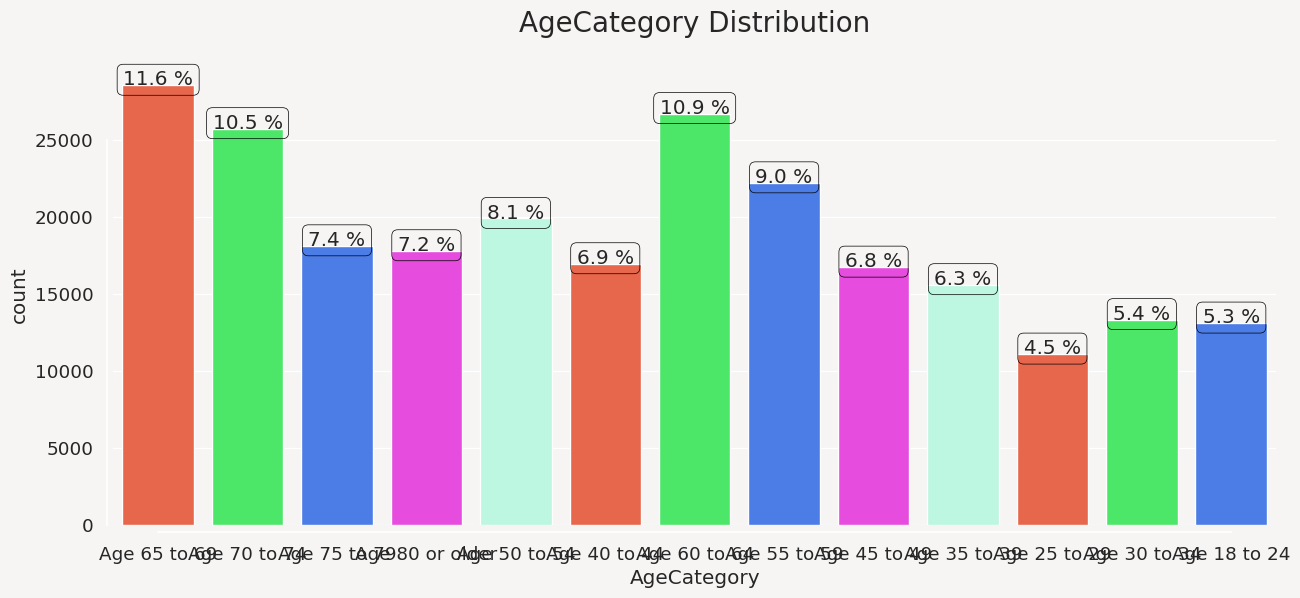

In [ ]:
plt.figure(figsize=(15, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['AgeCategory'], palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

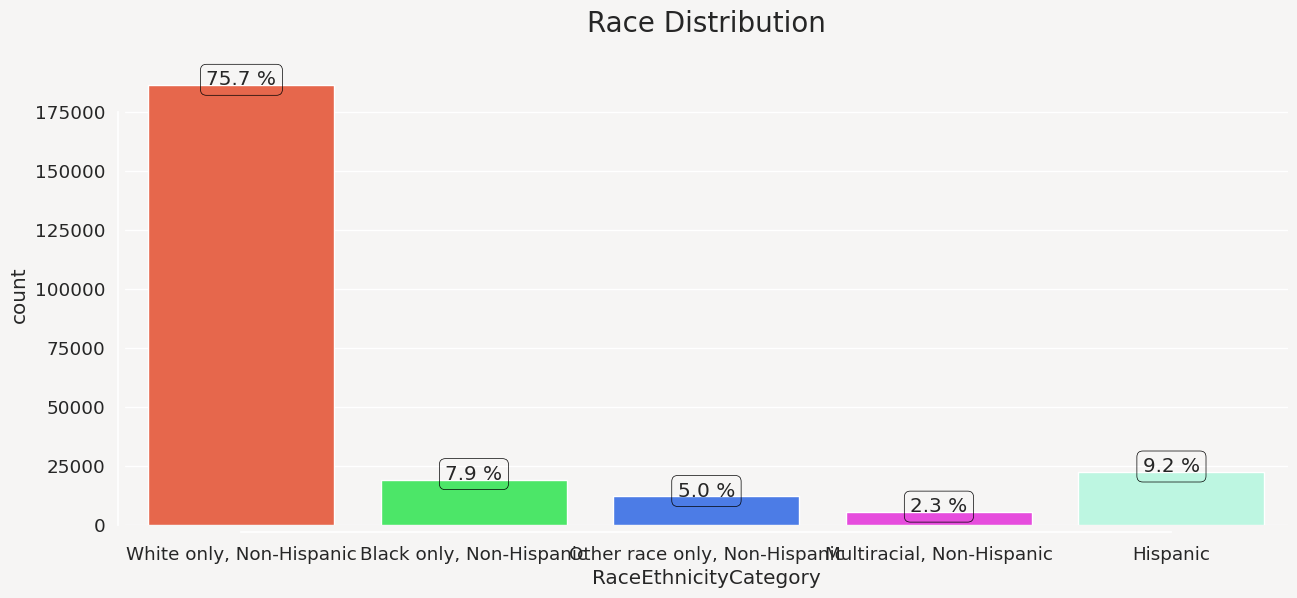

In [ ]:
plt.figure(figsize=(15, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['RaceEthnicityCategory'], palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

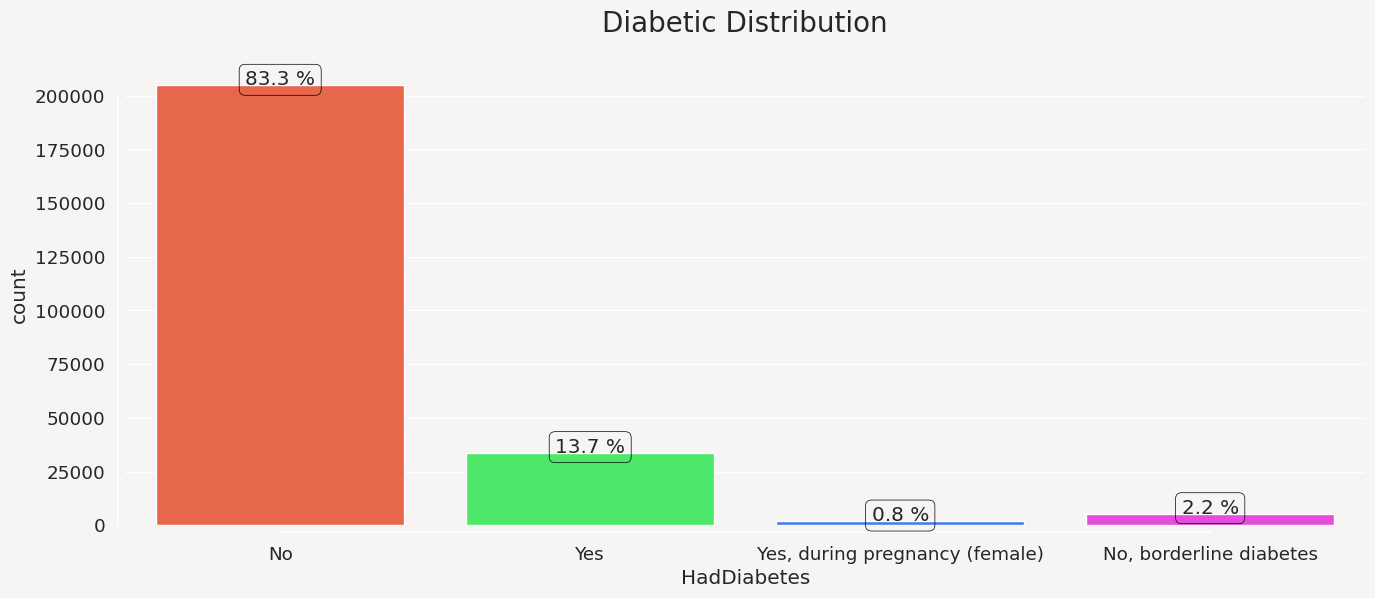

In [ ]:
plt.figure(figsize=(16, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HadDiabetes'], palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Diabetic Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

#### Bivariant Analysis

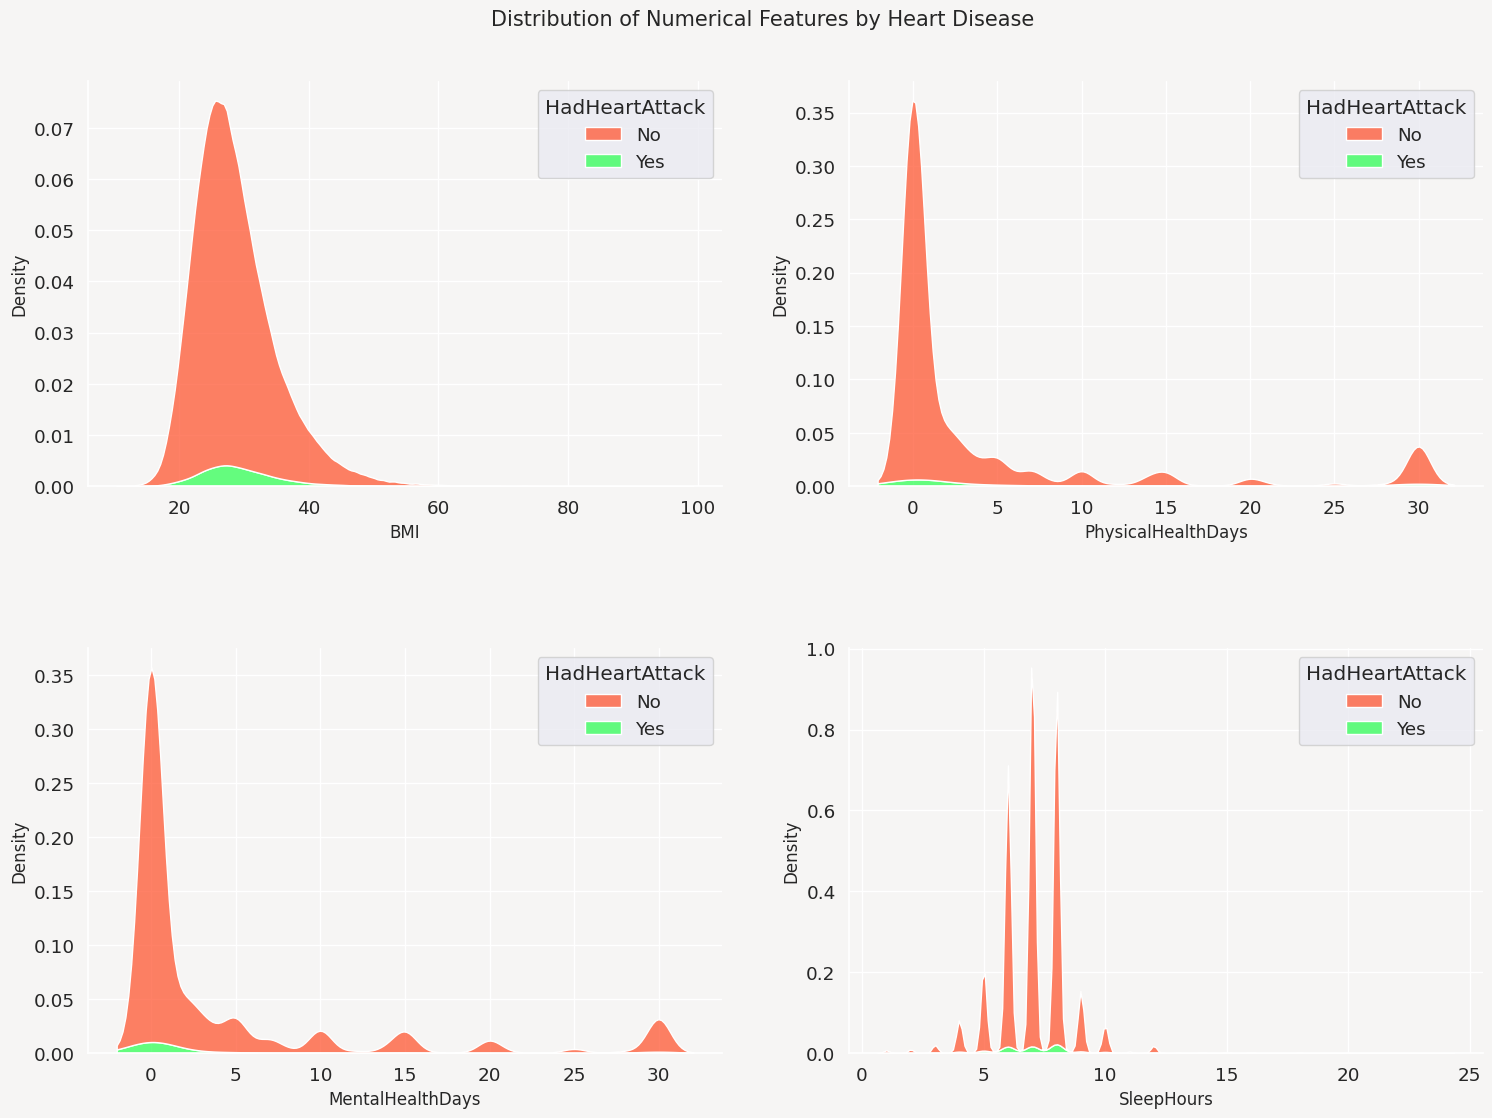

In [ ]:
num_feats = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(18, 6 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)

i = 0
for col in num_feats:
    plt.subplot(nrow, ncol, i + 1, facecolor='#F6F5F4')

    sns.kdeplot(data=df, x=col, hue="HadHeartAttack", multiple="stack", palette=mypal)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    i += 1

plt.suptitle('Distribution of Numerical Features by Heart Disease', fontsize=15)
plt.show()

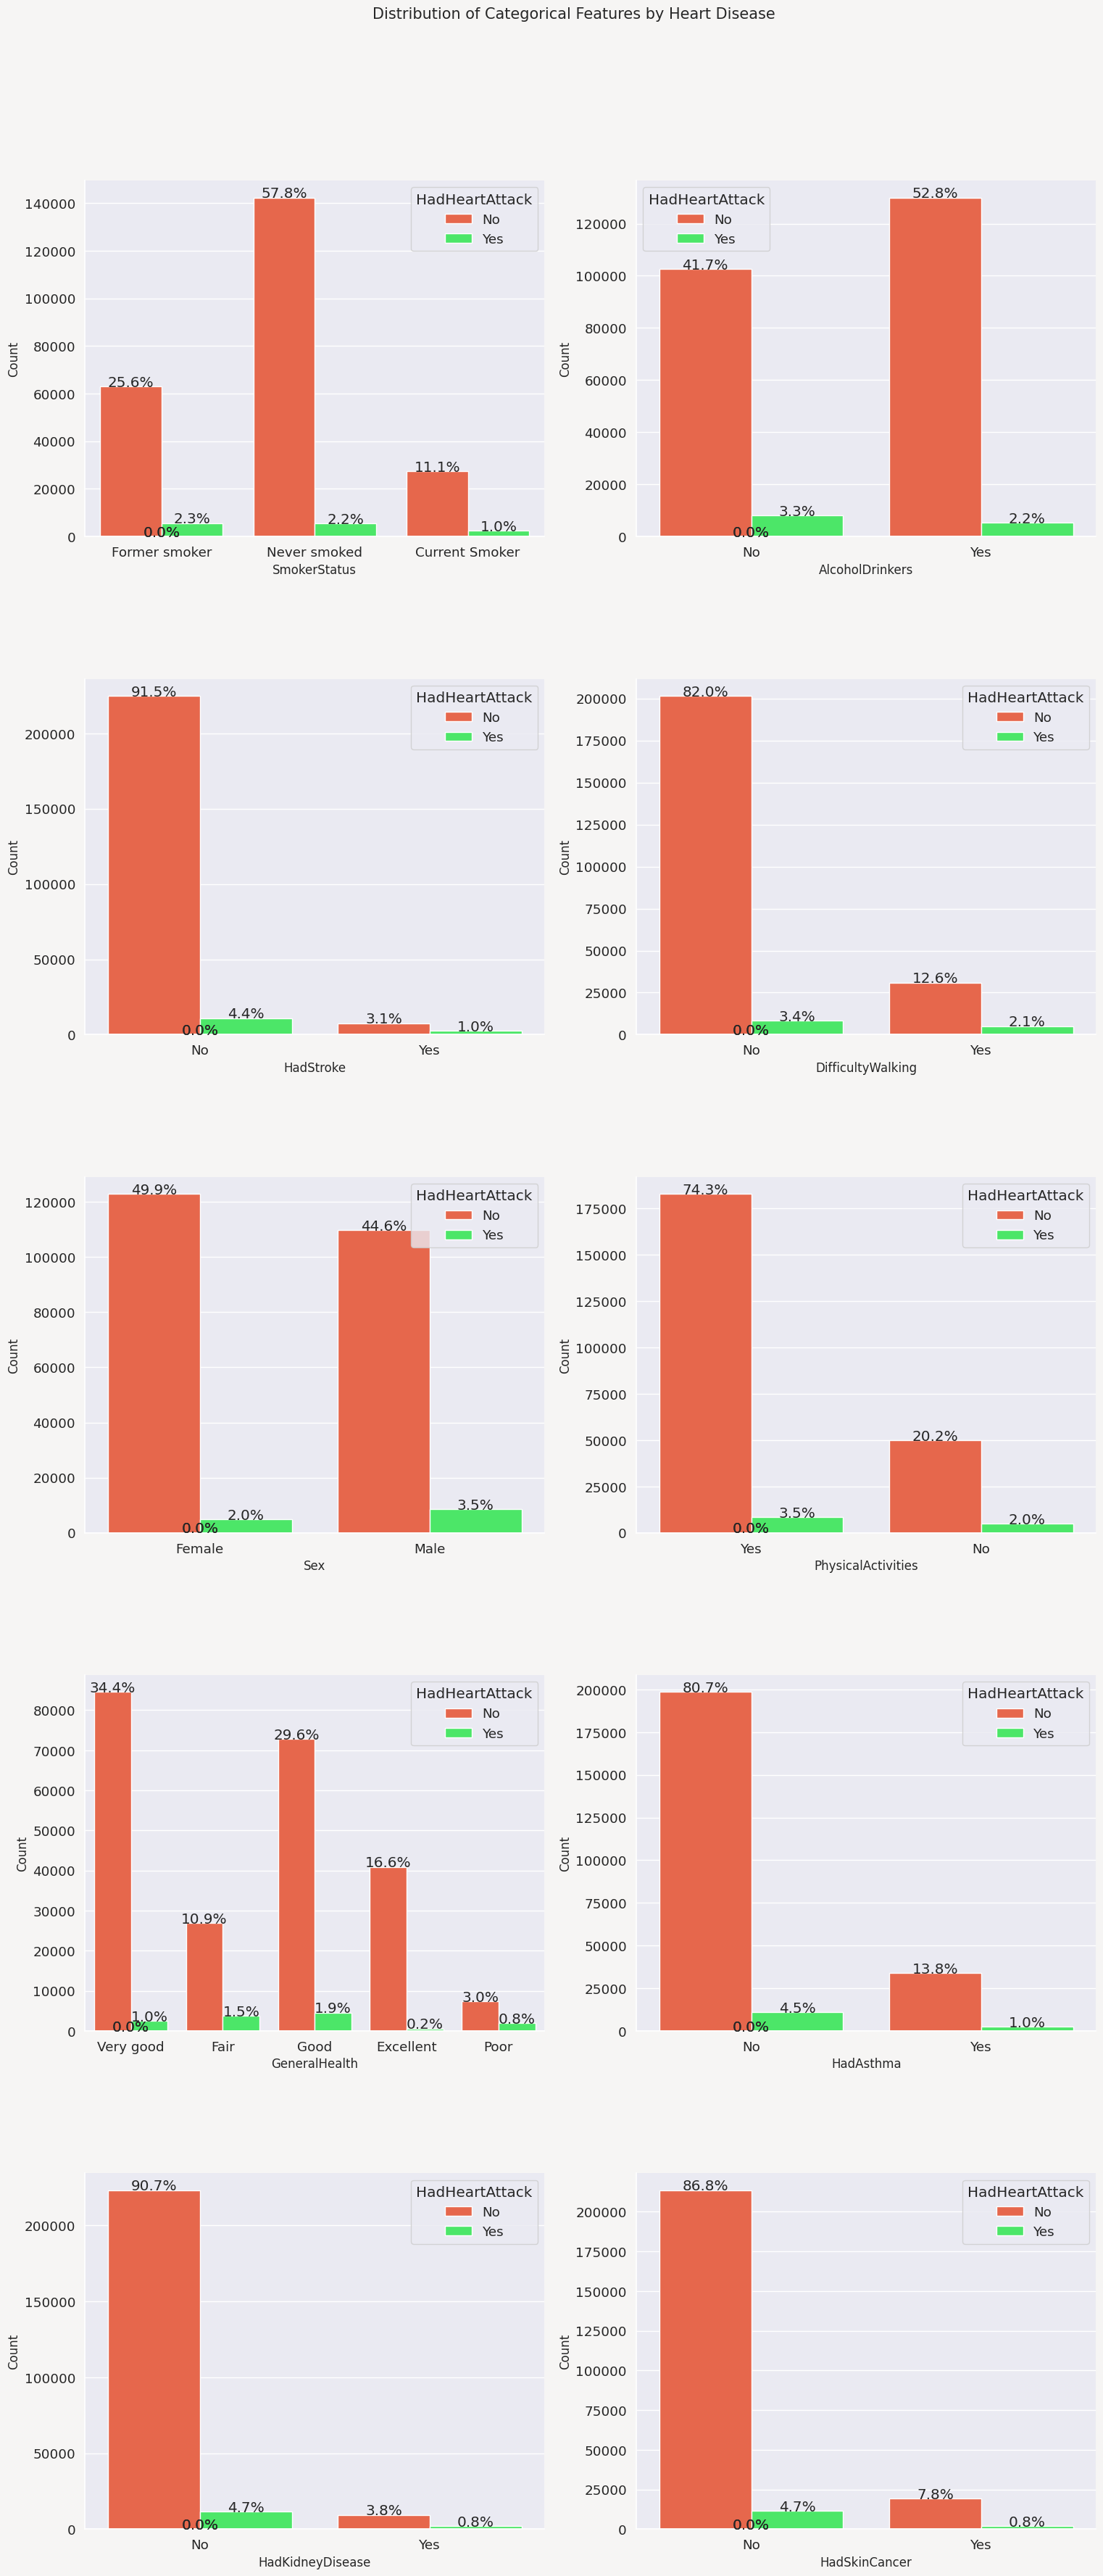

In [ ]:
cat_feats = ['SmokerStatus', 'AlcoholDrinkers', 'HadStroke', 'DifficultyWalking', 'Sex', 'PhysicalActivities', 'GeneralHealth', 'HadAsthma', 'HadKidneyDisease', 'HadSkinCancer']

L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)

for i, col in enumerate(cat_feats):
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=df, x=col, hue="HadHeartAttack", palette=mypal, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Disease', fontsize=15)
plt.show()

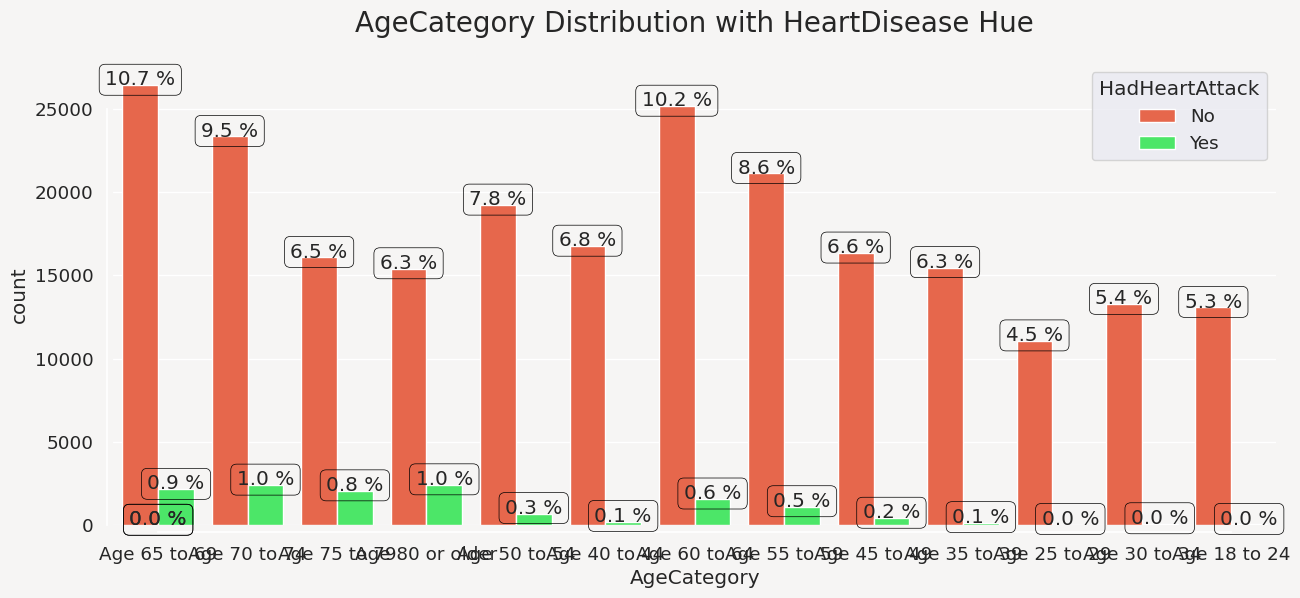

In [ ]:
plt.figure(figsize=(15, 6), facecolor='#F6F5F4')
total = float(len(df))

ax = sns.countplot(x='AgeCategory', hue='HadHeartAttack', data=df, palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution with HeartDisease Hue', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

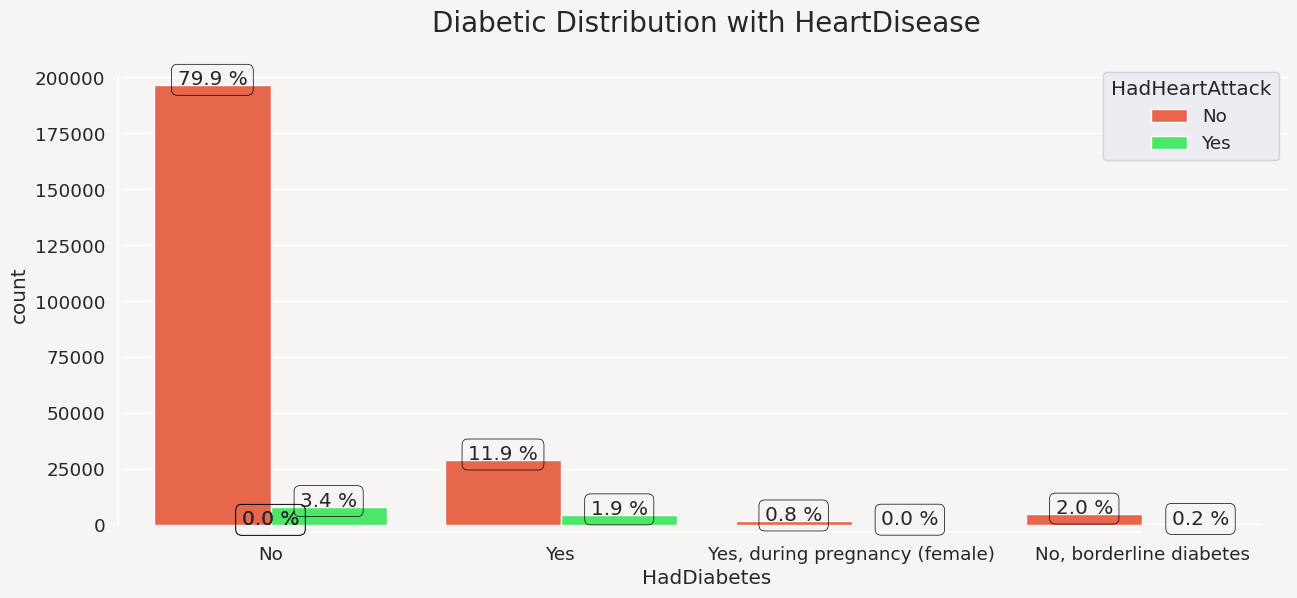

In [ ]:
plt.figure(figsize=(15, 6), facecolor='#F6F5F4')
total = float(len(df))

ax = sns.countplot(x='HadDiabetes', hue='HadHeartAttack', data=df, palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Diabetic Distribution with HeartDisease', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

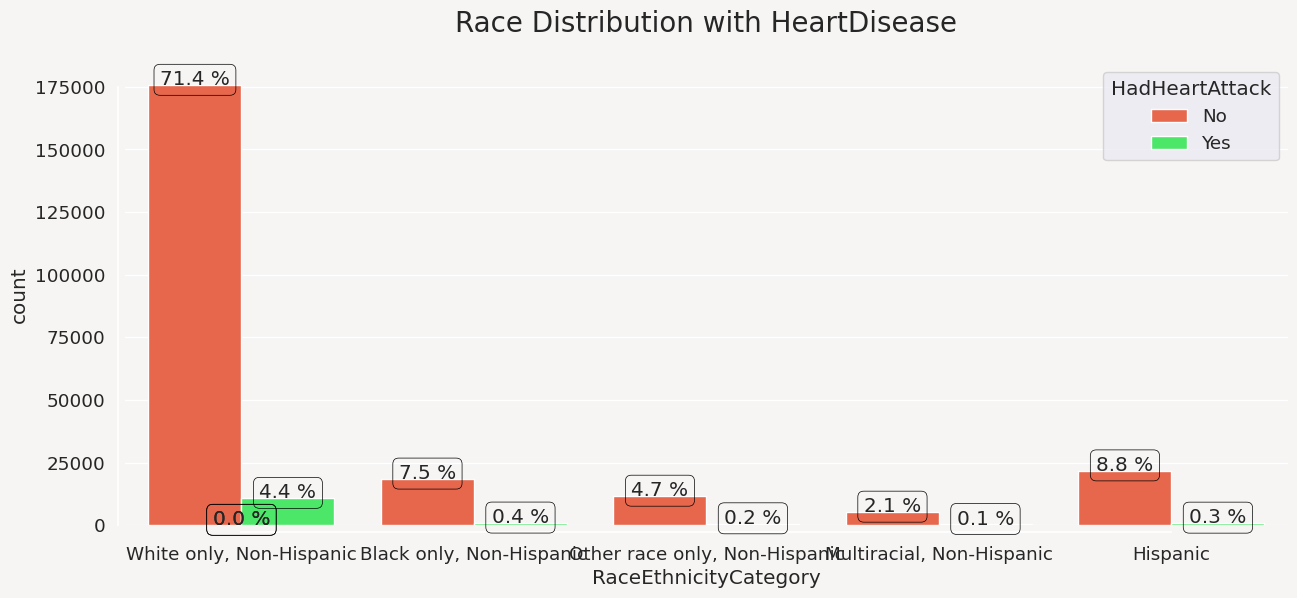

In [ ]:
plt.figure(figsize=(15, 6), facecolor='#F6F5F4')
total = float(len(df))

ax = sns.countplot(x='RaceEthnicityCategory', hue='HadHeartAttack', data=df, palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution with HeartDisease', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

#### Encoding

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1.replace({'No': 0, 'Yes': 1})

df1["Sex"] = df1["Sex"].replace({'Female': 0, 'Male': 1})

In [ ]:
diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 0,
    'Yes': 1,
    'Yes, during pregnancy (female)': 1
}

df1['HadDiabetes'] = df1['HadDiabetes'].replace(diabetic_mapping).astype(int)

In [ ]:
race_mapping = {
    'White only, Non-Hispanic': 0,
    'Black only, Non-Hispanic': 1,
    'Multiracial, Non-Hispanic': 2,
    'Hispanic': 3,
    'Other race only, Non-Hispanic': 4
}

df1['RaceEthnicityCategory'] = df1['RaceEthnicityCategory'].map(race_mapping).astype(int)

In [ ]:
gen_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

df1['GeneralHealth'] = df1['GeneralHealth'].replace(gen_health_mapping).astype(int)

In [ ]:
age_mapping = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}

df1['AgeCategory'] = df1['AgeCategory'].map(age_mapping).astype(int)

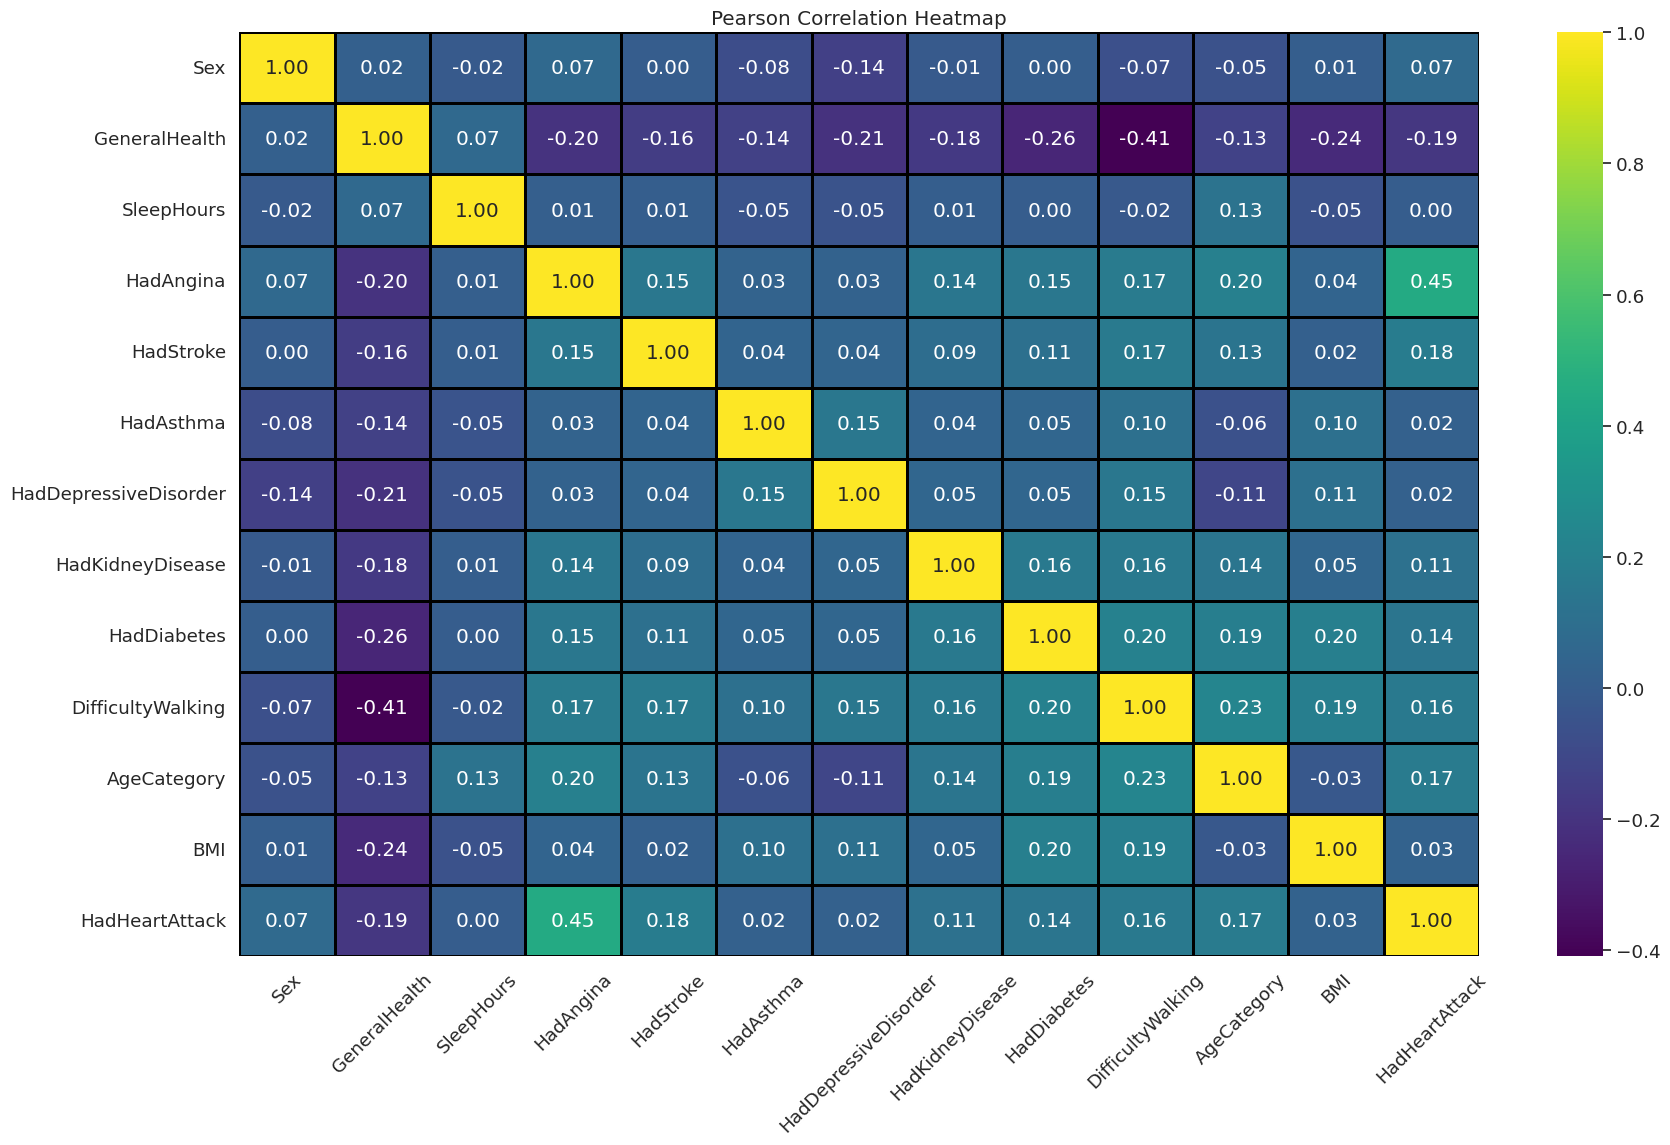

In [134]:
selected_columns = ['Sex','GeneralHealth','SleepHours','HadAngina','HadStroke','HadAsthma',
                    'HadDepressiveDisorder','HadKidneyDisease','HadDiabetes','DifficultyWalking','AgeCategory',
                    'BMI','HadHeartAttack']

pearson_corr = df1[selected_columns].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.2)
sns.heatmap(pearson_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Pearson Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

The correlation coefficients provide insights into the relationships between different features and the occurrence of heart attacks. Features such as difficulty walking, diabetes, and a history of stroke show moderate positive correlations with heart attacks, suggesting they may be significant risk factors.




Conversely, features like general health exhibit a moderate negative correlation, indicating that better overall health may offer some protection against heart attacks.




These findings highlight the importance of addressing modifiable risk factors such as diabetes, mobility issues, and overall health management in cardiovascular disease prevention strategies. Additionally, further research may be warranted to explore the underlying mechanisms driving these associations and inform targeted interventions for at-risk populations.

## 3. Diagnostic Analysis

<Figure size 1000x600 with 0 Axes>

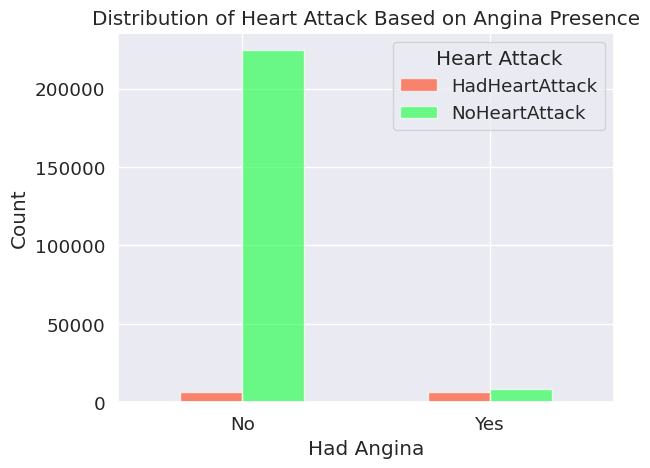

In [ ]:
# Filter data for people who had a heart attack
df_heart_attack = df[df['HadHeartAttack'] == 'Yes']

# Count the number of people who had a heart attack and had Angina or not
heart_attack_angina_count = df_heart_attack['HadAngina'].value_counts()

# Filter data for people who did not have a heart attack
df_no_heart_attack = df[df['HadHeartAttack'] == 'No']

# Count the number of people who did not have a heart attack and had Angina or not
no_heart_attack_angina_count = df_no_heart_attack['HadAngina'].value_counts()

# Create a DataFrame for the counts
angina_data = pd.DataFrame({'HadHeartAttack': heart_attack_angina_count, 'NoHeartAttack': no_heart_attack_angina_count})

# Plotting
plt.figure(figsize=(10, 6))
angina_data.plot(kind='bar', stacked=False, color=['#FF5733', '#33FF57'], alpha=0.7)
plt.title('Distribution of Heart Attack Based on Angina Presence')
plt.xlabel('Had Angina')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Attack')
plt.show()

The bar plot illustrates the distribution of heart attacks based on the presence of angina among individuals in the dataset. Each bar represents the count of individuals who either had or did not have a heart attack, segmented by whether they had angina or not. From the plot, it's discernible that among those who experienced a heart attack, there are notably more individuals who also had angina compared to those who didn't. Conversely, among individuals who did not have a heart attack, the count of individuals with and without angina is more evenly distributed. This suggests a potential association between angina and heart attacks, as indicated by the higher proportion of individuals with angina among those who experienced a heart attack.

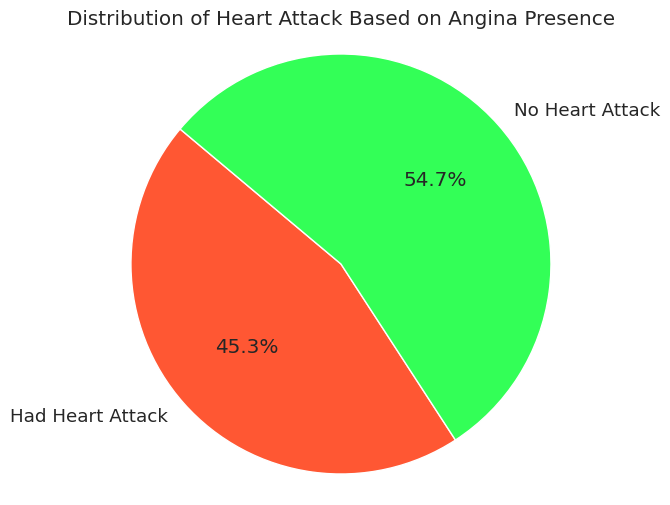

In [ ]:
# Filter data for people who had angina and had a heart attack
angina_heart_attack_count = df[(df['HadAngina'] == 'Yes') & (df['HadHeartAttack'] == 'Yes')].shape[0]

# Filter data for people who had angina but did not have a heart attack
angina_no_heart_attack_count = df[(df['HadAngina'] == 'Yes') & (df['HadHeartAttack'] == 'No')].shape[0]

# Labels for the pie chart
labels = ['Had Heart Attack', 'No Heart Attack']

# Data to plot
sizes = [angina_heart_attack_count, angina_no_heart_attack_count]

# Colors for each section
colors = ['#FF5733', '#33FF57']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Heart Attack Based on Angina Presence')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The pie chart visualizes the distribution of heart attacks based on the presence of angina among individuals in the dataset. It illustrates that among individuals who had angina, a substantial proportion also experienced a heart attack, as indicated by the larger slice labeled "Had Heart Attack." Conversely, the smaller slice labeled "No Heart Attack" represents individuals who had angina but did not experience a heart attack. This highlights the association between angina and heart attacks, with a notable majority of individuals with angina also experiencing a heart attack. The visualization effectively communicates this relationship in a clear and concise manner, providing insights into the prevalence of heart attacks among individuals with angina.

In [ ]:
df['GeneralHealth'].value_counts()

Very good    86999
Good         77409
Excellent    41525
Fair         30659
Poor          9430
Name: GeneralHealth, dtype: int64

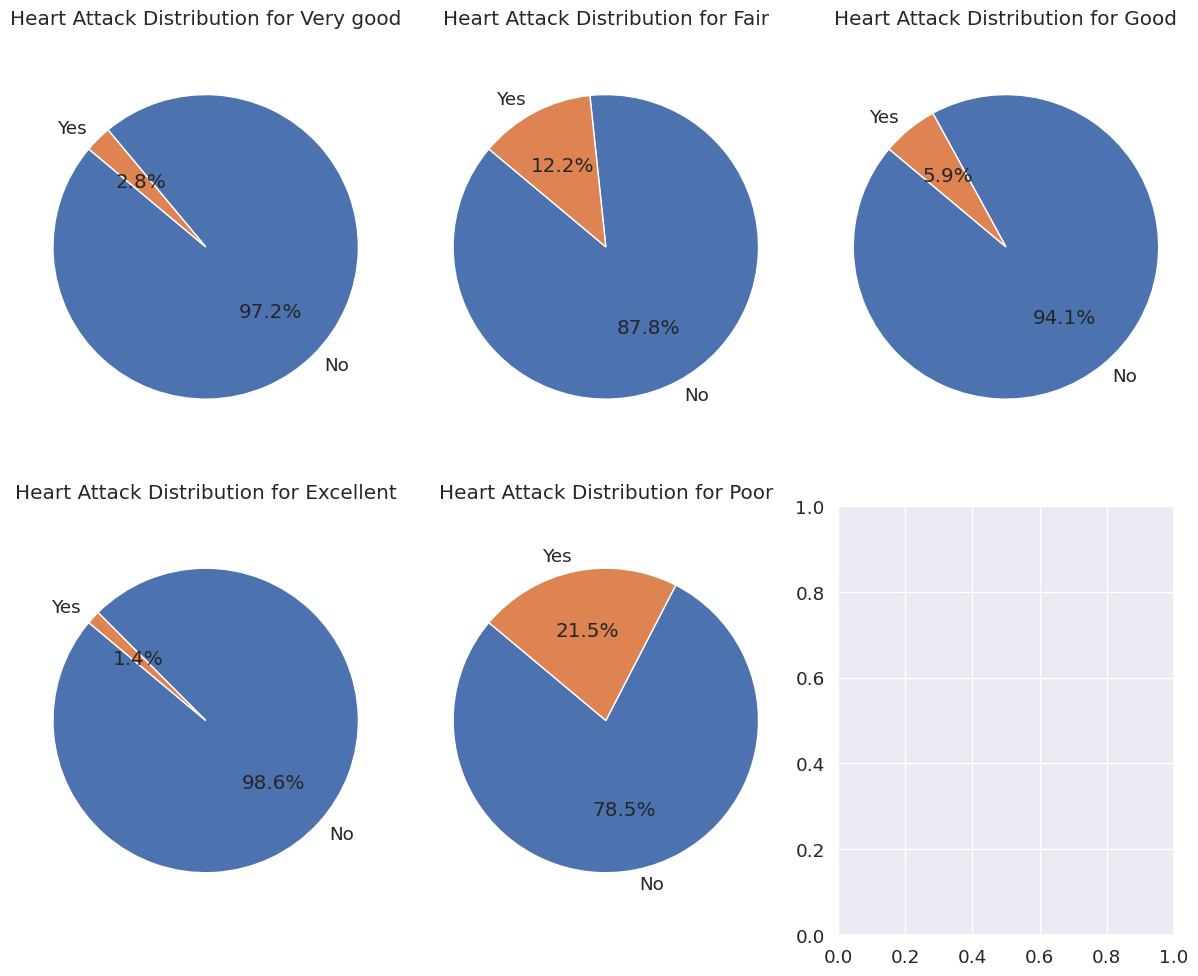

In [139]:
# Get unique values of 'GeneralHealth'
health_categories = df['GeneralHealth'].unique()

# Plotting pie charts for each category
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

for idx, category in enumerate(health_categories):
    # Filter data for the current category
    health_data = df[df['GeneralHealth'] == category]

    # Count occurrences of heart attack for the current category
    heart_attack_counts = health_data['HadHeartAttack'].value_counts()

    # Plotting pie chart
    ax = axes[idx//3, idx%3]
    ax.pie(heart_attack_counts, labels=heart_attack_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Heart Attack Distribution for {category}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

The code generates a grid of pie charts, each depicting the distribution of heart attacks within a specific category of general health status. By iterating over unique values of 'GeneralHealth', the code creates a pie chart for each category, illustrating the proportion of individuals who had or did not have a heart attack within that category. The grid layout enables easy comparison of heart attack distributions across different health categories. From the visualization, it can be inferred that the distribution of heart attacks varies among different general health statuses, with some categories showing higher proportions of individuals experiencing heart attacks compared to others. This analysis provides valuable insights into the relationship between general health status and the prevalence of heart attacks within the dataset.

## **INFERENCE**

**Gender Disparity:** There appears to be a gender disparity in heart attack prevalence, with males constituting the majority of individuals who experienced a heart attack compared to females.

**Age as a Significant Factor:** The distribution of heart attacks across different age groups indicates a clear trend of increasing occurrence with advancing age, emphasizing age as a significant risk factor for heart attacks.

**Geographic Variations:** There are notable variations in heart attack prevalence across different states, suggesting potential disparities in healthcare access or population demographics. Further exploration of these geographical differences is warranted to inform targeted interventions.

**Correlation Analysis:** The correlation coefficients highlight several factors associated with heart attacks, including difficulty walking, diabetes, and a history of stroke. Conversely, better general health exhibits a negative correlation with heart attacks, indicating a protective effect.

**Association with Angina:** Both the bar plot and pie chart illustrate a notable association between angina and heart attacks, with a higher proportion of individuals with angina experiencing heart attacks. This underscores the importance of recognizing angina as a potential warning sign for heart disease.

**Health Status Variation:** The grid of pie charts reveals variations in heart attack distribution across different general health statuses. Some categories show higher proportions of individuals experiencing heart attacks, suggesting a potential link between overall health status and heart attack risk.



Overall, the analysis underscores the complex interplay of various factors contributing to heart attack prevalence, including demographic characteristics, health behaviors, and comorbid conditions. Understanding these factors is essential for developing targeted interventions and preventive strategies aimed at reducing the burden of heart disease and promoting cardiovascular health.